# Chapter 4

In [122]:
import numpy as np
import math
import statistics as stats
import scipy.stats as scistats
import scipy.odr as ordire
import matplotlib.pyplot as plt
import os
from pandas import read_table, read_csv
from netCDF4 import Dataset as ds
# These import statements bring in the python packages we'll need. 

plt.rcParams['figure.figsize'] = (12, 12)

In [29]:
def linregress_CIs(xd,yd,conf=0.95):
    alpha=1.-conf   # significance
    n = xd.size   # data sample size
    x = np.linspace(xd.min(),xd.max(),100)
        
    # Predicted values from fitted model:
    a, b, r, p, err = scistats.linregress(xd,yd)
    y = a*x+b
    
    sd = 1./(n-2.)*np.sum((yd-a*xd-b)**2)
    sd = np.sqrt(sd)
    sxd = np.sum((xd-xd.mean())**2)
    sx  = (x-xd.mean())**2
    
    # quantile of student's t distribution for p=1-alpha/2
    q = scistats.t.ppf(1.-alpha/2, n-2)
    
    # get the upper and lower CI:
    dy = q*sd*np.sqrt( 1./n + sx/sxd )
    dr = q*sd*np.sqrt(1 + 1./n + sx/sxd )
    rl = y - dr
    ru = y + dr
    yl = y-dy
    yu = y+dy
    
    return yl,yu,x,rl,ru

## Figure 4.1

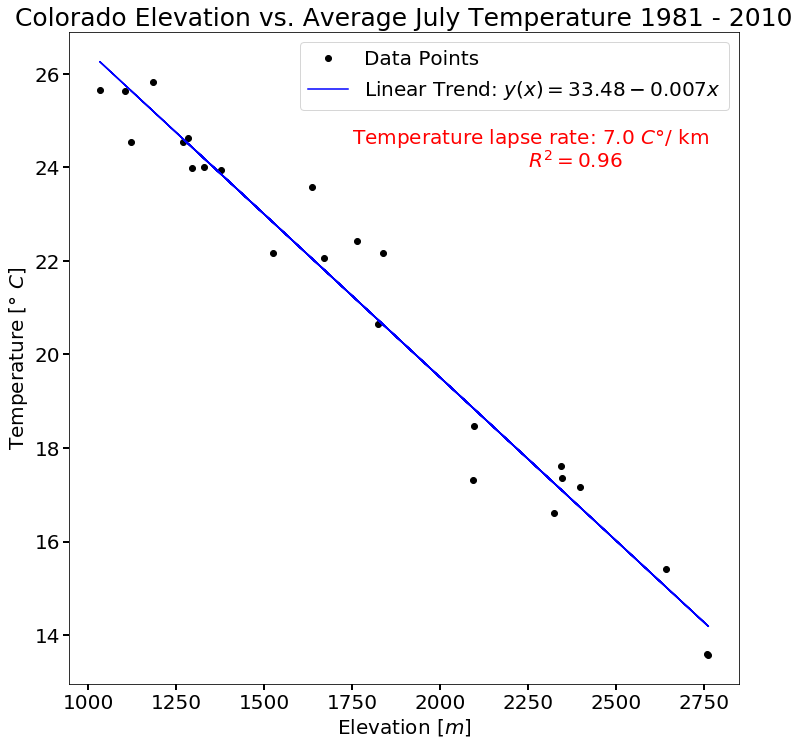

In [159]:
x = np.array([1671.5, 1635.6, 2097.0, 1295.4, 1822.7, 2396.9, 2763.0, 1284.7,
1525.2, 1328.6, 1378.9, 2323.8, 2757.8, 1033.3, 1105.5, 1185.7,
2343.9, 1764.5, 1271.0, 2347.3, 2094.0, 2643.2, 1837.9, 1121.7])
y = np.array([22.064, 23.591, 18.464, 23.995, 20.645, 17.175, 13.582, 24.635,
22.178, 24.002, 23.952, 16.613, 13.588, 25.645, 25.625, 25.828,
17.626, 22.433, 24.539, 17.364, 17.327, 15.413, 22.174, 24.549])

corrMatr = np.corrcoef(x,y)
Rsqu = corrMatr[0,1]**2
trend = np.array(np.polyfit(x, y, 1))
abline = trend[1] + x*trend[0]


fig, ax = plt.subplots(figsize=(12,12))
ax.plot(x,y, 'ko', label = "Data Points");
ax.plot(x,abline, 'b-', label = r"Linear Trend: $y(x) = %1.2f %1.3f x$"%(trend[1], trend[0]));
ax.set_title("Colorado Elevation vs. Average July Temperature 1981 - 2010",size=25)
ax.set_xlabel("Elevation $[m]$", size = 20)
ax.set_ylabel(r"Temperature $\left[\degree\ C\right]$", size = 20);
ax.tick_params(length=6, width=2, labelsize=20);
ax.text(1750, 24.5, r"Temperature lapse rate: 7.0 $C\degree /$ km", color= 'r', size = 20)
ax.text(2250, 24, r"$R^2 = %.2f$" % Rsqu, color= 'r', size = 20)
ax.legend(loc=('best'),prop={'size':20});
plt.savefig("Figure4-1.jpg", bbox_inches='tight')

## Figure 4.2

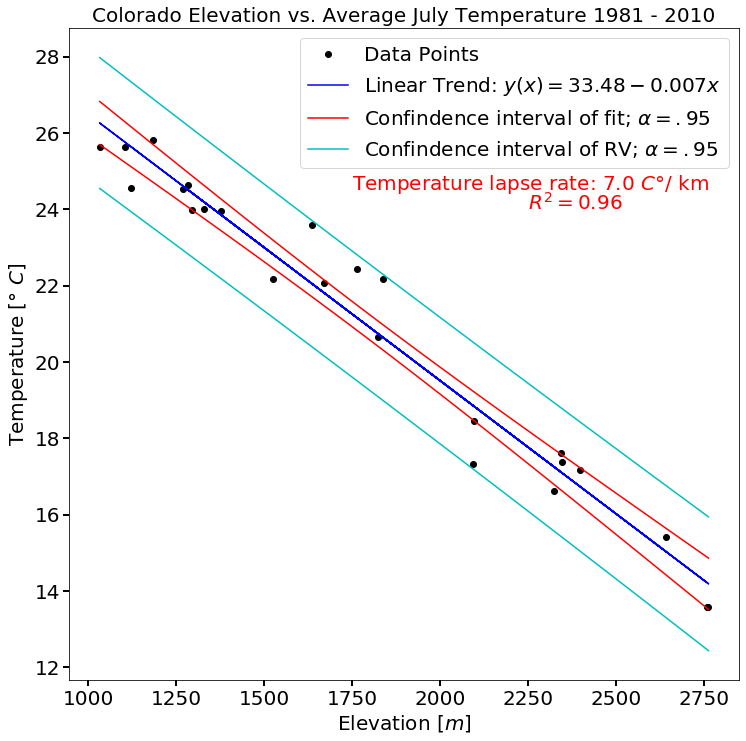

In [160]:
yl,yu,xd,rl,ru = linregress_CIs(x,y)

fig, ax = plt.subplots(figsize=(12,12))
ax.plot(x,y, 'ko', label = "Data Points");
ax.plot(x,abline, 'b-', label = r"Linear Trend: $y(x) = %1.2f %1.3f x$"%(trend[1], trend[0]));
ax.plot(xd, yu, 'r-', label = r"Confindence interval of fit; $\alpha = .95$")
ax.plot(xd, yl, 'r-')
ax.plot(xd, ru, 'c-', label = r"Confindence interval of RV; $\alpha = .95$")
ax.plot(xd, rl, 'c-')
ax.set_title("Colorado Elevation vs. Average July Temperature 1981 - 2010",size=20)
ax.set_xlabel("Elevation $[m]$", size = 20)
ax.set_ylabel(r"Temperature $\left[\degree\ C\right]$", size = 20);
ax.tick_params(length=6, width=2, labelsize=20);
ax.text(1750, 24.5, r"Temperature lapse rate: 7.0 $C\degree /$ km", color= 'r', size = 20)
ax.text(2250, 24, r"$R^2 = %.2f$" % Rsqu, color= 'r', size = 20)
ax.legend(loc=('best'),prop={'size':20});
plt.savefig("Figure4-2.jpg", bbox_inches='tight')

## Figure 4.3

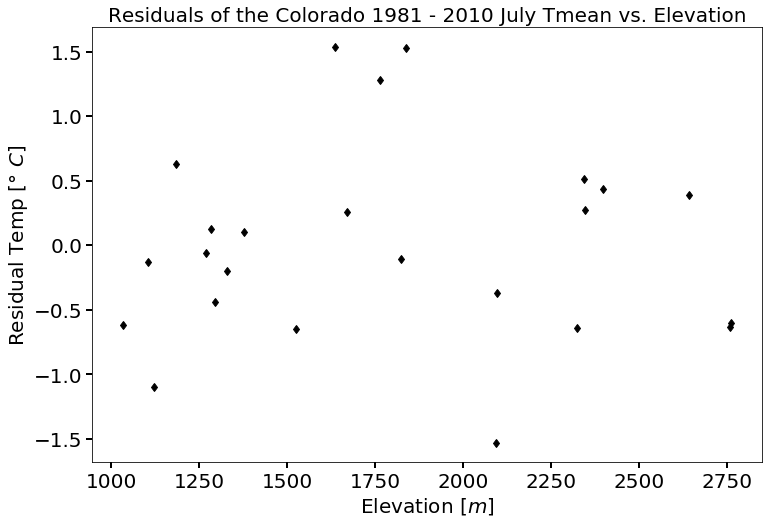

In [161]:
r = y - abline
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, r, 'kd')
ax.set_title("Residuals of the Colorado 1981 - 2010 July Tmean vs. Elevation",size=20)
ax.set_xlabel("Elevation $[m]$", size = 20)
ax.set_ylabel(r"Residual Temp $\left[\degree\ C\right]$", size = 20);
ax.tick_params(length=6, width=2, labelsize=20);
#ax.legend(loc=('best'),prop={'size':20});
plt.savefig("Figure4-3.jpg", bbox_inches='tight')

## Figure 4.4

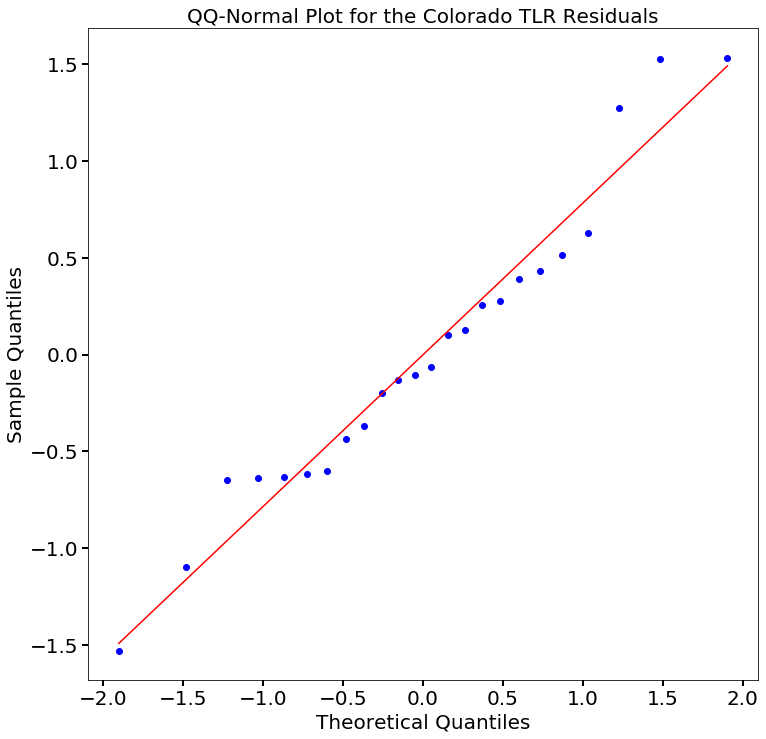

In [162]:
fig, ax = plt.subplots(figsize=(12,12))
scistats.probplot(r, dist="norm", plot=ax);
ax.set_ylabel("Sample Quantiles", size = 20);
ax.set_xlabel("Theoretical Quantiles", size = 20);
ax.set_title("QQ-Normal Plot for the Colorado TLR Residuals",size=20);
ax.tick_params(length=6, width=2, labelsize=20);
plt.savefig("Figure4-4.jpg", bbox_inches='tight')

In [94]:
dtmean = np.array(read_table("aravg.ann.land_ocean.90S.90N.v4.0.1.201907.txt", 
                      header = None, delimiter = "\s+"))
xDT = dtmean[0:139, 0]
yDT = dtmean[0:139, 1]

trendDT = np.array(np.polyfit(xDT, yDT, 1))
ablineDT = trendDT[1] + xDT*trendDT[0]
yld,yud,xdd,rld,rud = linregress_CIs(xDT,yDT)


## Figure 4.5

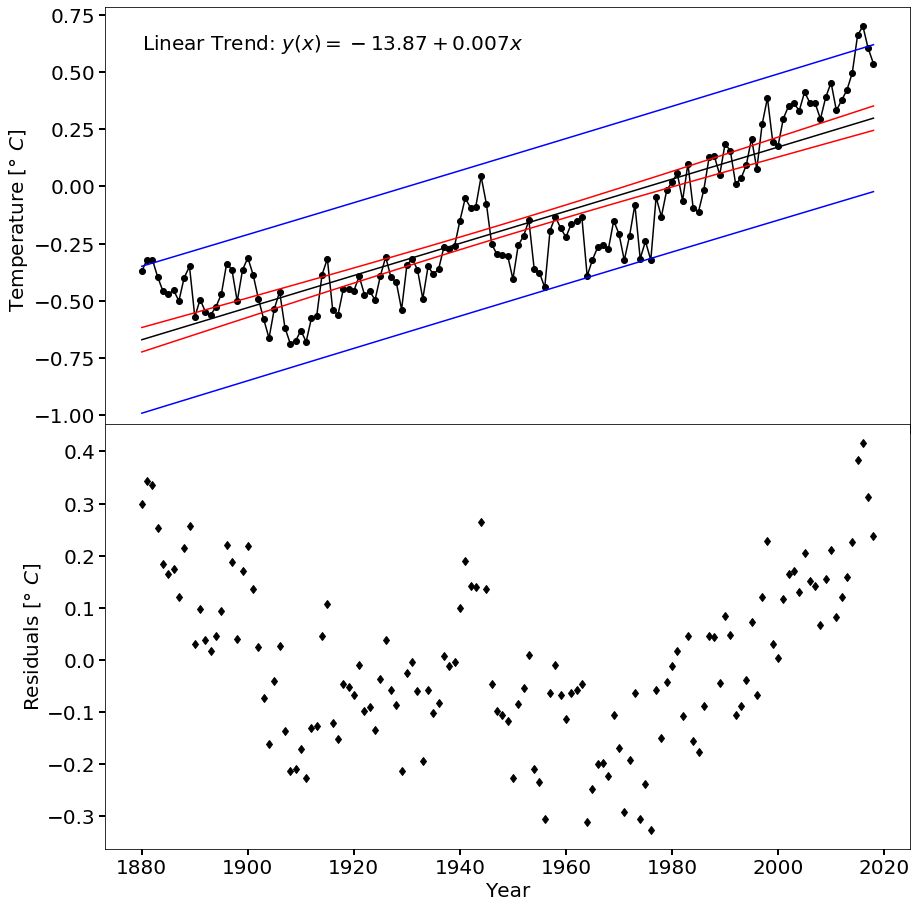

In [163]:
fig, ax = plt.subplots(2, 1, figsize=(12,12))
ax[0].plot(xDT, yDT, 'ko-')
ax[0].plot(xDT, ablineDT, 'k-')
ax[0].plot(xdd, yld, 'r-')
ax[0].plot(xdd, yud, 'r-')
ax[0].plot(xdd, rld, 'b-')
ax[0].plot(xdd, rud, 'b-')

ax[1].plot(xDT, yDT - ablineDT, 'kd')

ax[0].tick_params(length=6, width=2, labelsize=20);
ax[0].set_ylabel(r"Temperature $\left[\degree\ C\right]$", size = 20)
ax[0].text(1880, .6, r"Linear Trend: $y(x) = %1.2f + %1.3f x$"%(trendDT[1], trendDT[0]), color = 'k', size = 20)
ax[0].axes.get_xaxis().set_visible(False)

ax[1].tick_params(length=6, width=2, labelsize=20);
ax[1].set_ylabel(r"Residuals $\left[\degree\ C\right]$", size = 20)
ax[1].set_xlabel("Year", size = 20)

fig.tight_layout(pad=-1.5)

plt.savefig("Figure4-5.jpg", bbox_inches='tight')

## Figure 4.6

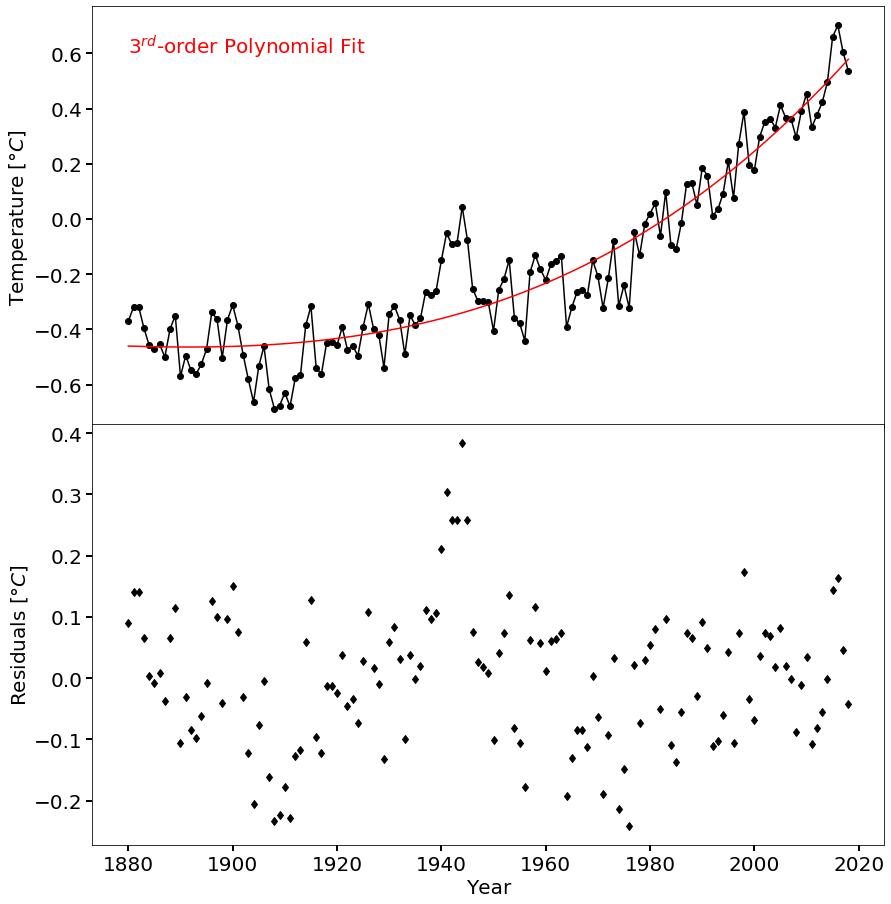

In [164]:
trendDT3 = np.array(np.polyfit(xDT, yDT, 3))
ablineDT3 = trendDT3[3] + xDT*trendDT3[2] + (xDT**2)*trendDT3[1] + (xDT**3)*trendDT3[0]

fig, ax = plt.subplots(2, 1, figsize=(12,12))
ax[0].plot(xDT, yDT, 'ko-')
ax[0].plot(xDT, ablineDT3, 'r-')


ax[1].plot(xDT, yDT - ablineDT3, 'kd')

ax[0].tick_params(length=6, width=2, labelsize=20);
ax[0].set_ylabel(r"Temperature $\left[\degree C\right]$", size = 20)
ax[0].text(1880, .6, r"$3^{rd}$-order Polynomial Fit", color = 'r', size = 20)
ax[0].axes.get_xaxis().set_visible(False)

ax[1].tick_params(length=6, width=2, labelsize=20);
ax[1].set_ylabel(r"Residuals $\left[\degree C\right]$", size = 20)
ax[1].set_xlabel("Year", size = 20)

fig.tight_layout(pad=-1.5)

plt.savefig("Figure4-6.jpg", bbox_inches='tight')

In [166]:
guess = np.polyfit(xDT, yDT, 9)

def fit_func(p, t):
    return p[0]*t**9 + p[1]*t**8 + p[2]*t**7 + p[3]*t**6 + p[4]*t**5 + p[5]*t**4 + p[6]*t**3 + p[7]*t**2 + p[8]*t +  p[9]

Model = ordire.Model(fit_func)
Data = ordire.RealData(xDT, yDT)
Odr = ordire.ODR(Data, Model, guess, maxit = 10000000)
output = Odr.run()

beta = output.beta

C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


## Figure 4.7

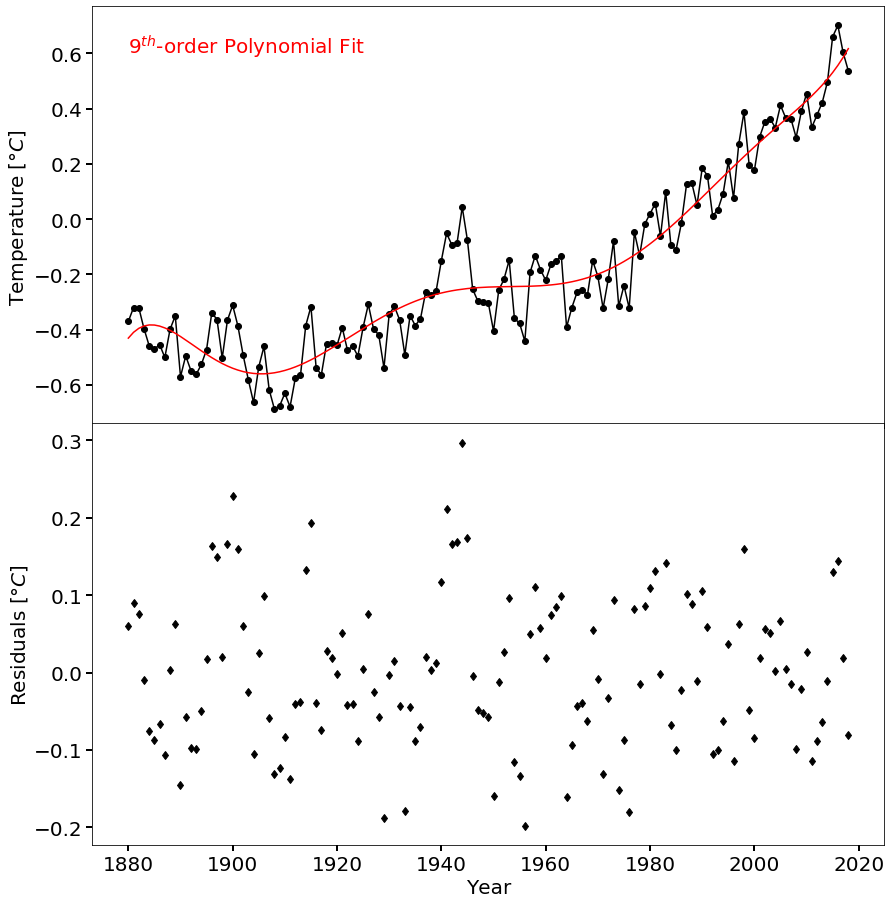

In [165]:
fig, ax = plt.subplots(2, 1, figsize=(12,12))
ax[0].plot(xDT, yDT, 'ko-')
ax[0].plot(xDT, fit_func(beta, xDT), 'r-')


ax[1].plot(xDT, yDT - fit_func(beta, xDT), 'kd')

ax[0].tick_params(length=6, width=2, labelsize=20);
ax[0].set_ylabel(r"Temperature $\left[\degree C\right]$", size = 20)
ax[0].text(1880, .6, r"$9^{th}$-order Polynomial Fit", color = 'r', size = 20)
ax[0].axes.get_xaxis().set_visible(False)


ax[1].tick_params(length=6, width=2, labelsize=20);
ax[1].set_ylabel(r"Residuals $\left[\degree C\right]$", size = 20)
ax[1].set_xlabel("Year", size = 20)

fig.tight_layout(pad=-1.5)

plt.savefig("Figure4-7.jpg", bbox_inches='tight')